# EDA for NYC Taxi Trip Duration

## 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from geopy.distance import great_circle

## 2. Import the Dataset

In [2]:
data = pd.read_csv('nyc_taxi_trip_duration.csv')

### Checking the first five rows of the dataset

In [3]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


### Checking the bottom five rows of the dataset

In [4]:
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


# 3. Data Analysis

### Checking the shape of the dataset

In [5]:
data.shape

(729322, 11)

### Printing the columns present

In [6]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

### Checking the data types

In [7]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

### Looking at the description of the data frame

In [8]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


### Checking for the Null Values

In [9]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## Converting Features to the right Datatype

In [10]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [11]:
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [12]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

In [13]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

## Creating New Features

In [14]:
data['pickup_day'] = data['pickup_datetime'].dt.day_name()

In [15]:
data['dropoff_day'] = data['dropoff_datetime'].dt.day_name()

In [16]:
data['pickup_day_number'] = data['pickup_datetime'].dt.weekday

In [17]:
data['dropoff_day_number'] = data['dropoff_datetime'].dt.weekday

In [18]:
data['pickup_month'] = data['pickup_datetime'].dt.month_name()

In [19]:
data['dropoff_month'] = data['dropoff_datetime'].dt.month_name()

In [20]:
data['pickup_hour'] = data['pickup_datetime'].dt.hour

In [21]:
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour

In [22]:
data['pickup_minute'] = data['pickup_datetime'].dt.minute

In [23]:
data['dropoff_minute'] = data['dropoff_datetime'].dt.minute

In [24]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_day_number,dropoff_day_number,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,Monday,0,0,February,February,16,16,40,47
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,Friday,Friday,4,4,March,March,23,23,35,53
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,Sunday,6,6,February,February,17,18,59,26
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,Tuesday,Tuesday,1,1,January,January,9,10,44,3
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,Wednesday,Wednesday,2,2,February,February,6,6,42,56


In [25]:
data['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

In [26]:
data['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [27]:
data['trip_duration']

0          400
1         1100
2         1635
3         1141
4          848
          ... 
729317     296
729318     315
729319     673
729320     447
729321    1224
Name: trip_duration, Length: 729322, dtype: int64

In [28]:
data['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
672240          1
102646          1
533760          1
512833          1
622664          1
Name: trip_duration, Length: 729322, dtype: int64

### Removing outliers 

In [29]:
data.drop(data[data['trip_duration'] == 1939736].index, inplace = True)

In [30]:
data['trip_duration'].sort_values(ascending=False)

259437    86391
119185    86387
177225    86378
496391    86377
90557     86369
          ...  
672240        1
102646        1
533760        1
512833        1
622664        1
Name: trip_duration, Length: 729321, dtype: int64

### Function to calculate the distance 

In [31]:
def calculate_Distance(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude):
    start_coordinates = (pickup_latitude, pickup_longitude)
    stop_coordinates = (dropoff_latitude, dropoff_longitude)
    return great_circle(start_coordinates, stop_coordinates).kilometers

In [32]:
data['distance'] =data.apply(lambda x: calculate_Distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']), axis=1)

In [33]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_number,dropoff_day_number,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,0,0,February,February,16,16,40,47,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,Friday,4,4,March,March,23,23,35,53,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,6,6,February,February,17,18,59,26,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,Tuesday,1,1,January,January,9,10,44,3,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,Wednesday,2,2,February,February,6,6,42,56,4.328540


# Univariate Analysis

### Trip Duration Histogram

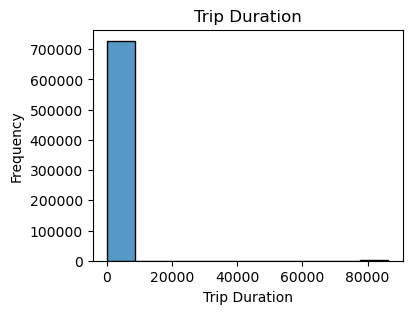

In [34]:
plt.figure(figsize=(4, 3)) 
sns.histplot(data['trip_duration'], kde=False, bins=10)
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.title('Trip Duration')
plt.show()

### Passanger Count Countplot

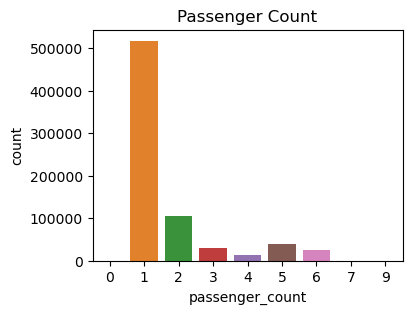

In [35]:
plt.figure(figsize=(4, 3))  
sns.countplot(x='passenger_count',data=data)
plt.title('Passenger Count')
plt.show()

### Vendor IDs Countplot

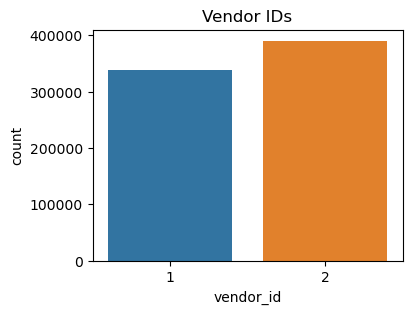

In [36]:
plt.figure(figsize=(4, 3))  
sns.countplot(x='vendor_id', data=data)
plt.title('Vendor IDs')
plt.show()

### Pickup Hour and Dropoff Hour Countplot

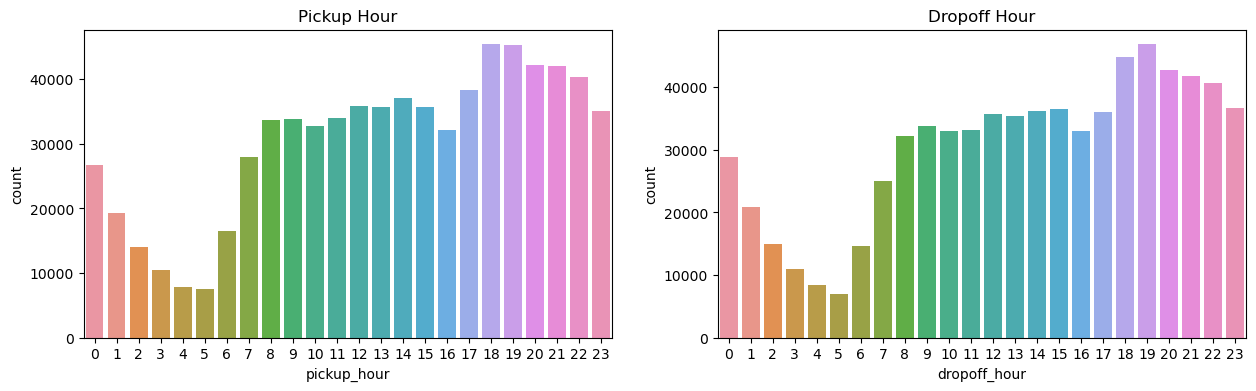

In [37]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(15,4))
ax1.set_title('Pickup Hour')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax1)
ax2.set_title('Dropoff Hour')
ax=sns.countplot(x="dropoff_hour",data=data,ax=ax2)

### Pickup Day and Dropoff Day Countplot

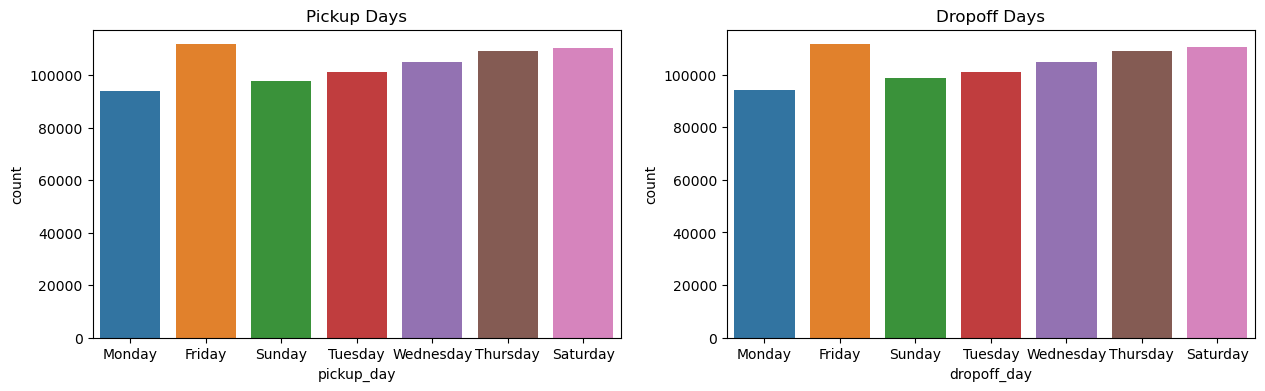

In [38]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(15,4))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=data,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=data,ax=ax2)

### Pickup Month and Dropoff Month Countplot

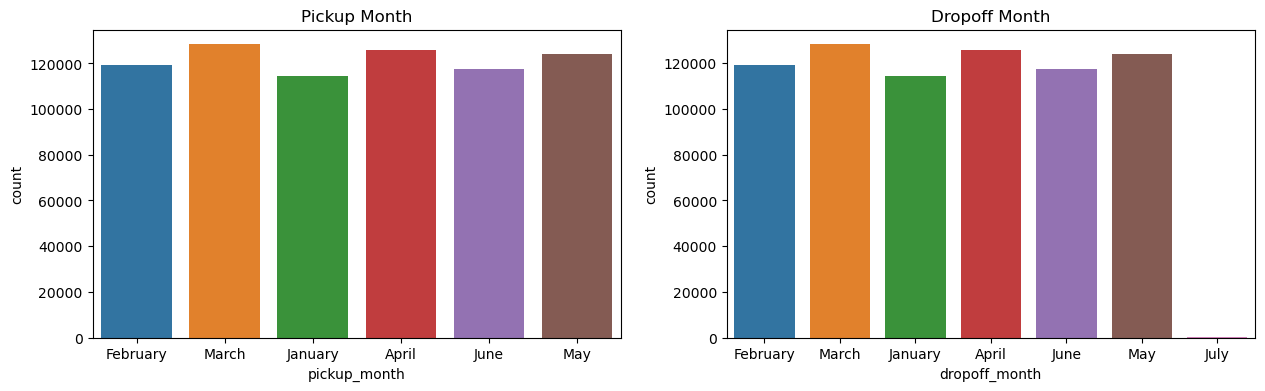

In [39]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(15,4))
ax1.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax1)
ax2.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax2)

#  Bivariate Analysis

<Figure size 400x300 with 0 Axes>

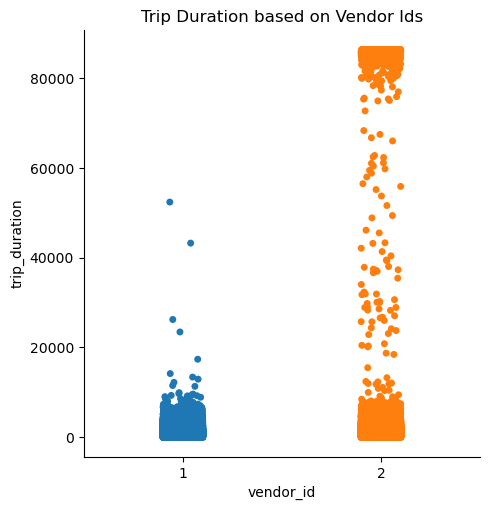

In [40]:
plt.figure(figsize=(4, 3))
sns.catplot(x='vendor_id', y='trip_duration', data=data, kind='strip')
plt.title('Trip Duration based on Vendor Ids')
plt.show()

<Figure size 400x300 with 0 Axes>

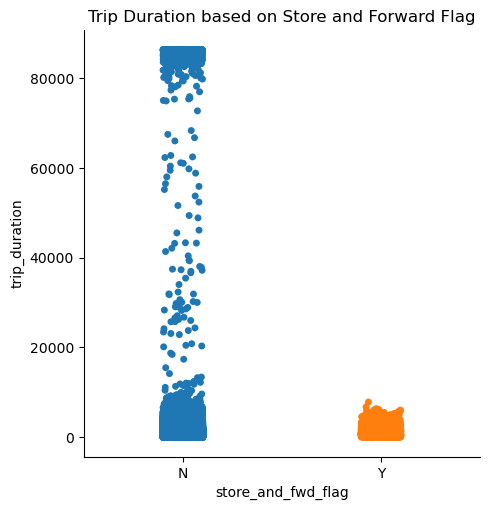

In [41]:
plt.figure(figsize=(4, 3))
sns.catplot(x='store_and_fwd_flag', y='trip_duration', data=data, kind='strip')
plt.title('Trip Duration based on Store and Forward Flag')
plt.show()

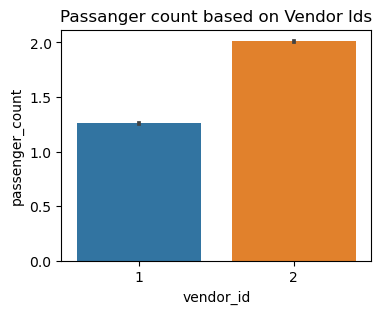

In [42]:
plt.figure(figsize=(4, 3))
sns.barplot(x='vendor_id', y='passenger_count', data=data)
plt.title('Passanger count based on Vendor Ids')
plt.show()

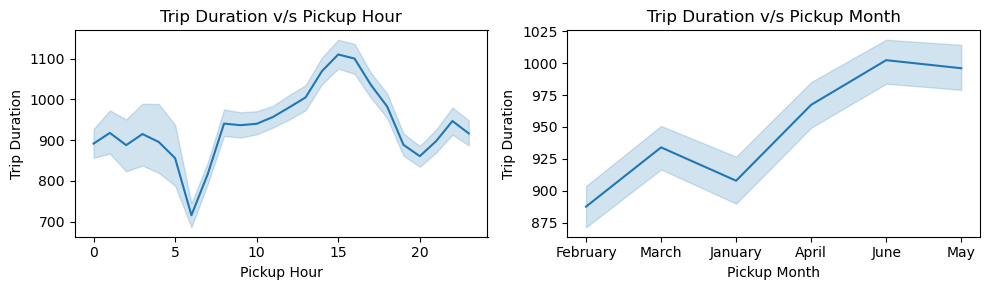

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

sns.lineplot(x='pickup_hour', y='trip_duration', data=data, ax=axs[0])
axs[0].set_xlabel('Pickup Hour')
axs[0].set_ylabel('Trip Duration')
axs[0].set_title('Trip Duration v/s Pickup Hour')

sns.lineplot(x='pickup_month', y='trip_duration', data=data, ax=axs[1])
axs[1].set_xlabel('Pickup Month')
axs[1].set_ylabel('Trip Duration')
axs[1].set_title('Trip Duration v/s Pickup Month')

plt.tight_layout()

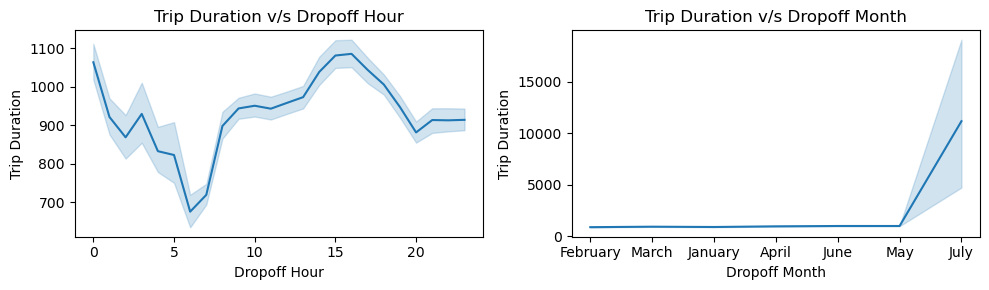

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

sns.lineplot(x='dropoff_hour', y='trip_duration', data=data, ax=axs[0])
axs[0].set_xlabel('Dropoff Hour')
axs[0].set_ylabel('Trip Duration')
axs[0].set_title('Trip Duration v/s Dropoff Hour')

sns.lineplot(x='dropoff_month', y='trip_duration', data=data, ax=axs[1])
axs[1].set_xlabel('Dropoff Month')
axs[1].set_ylabel('Trip Duration')
axs[1].set_title('Trip Duration v/s Dropoff Month')

plt.tight_layout()

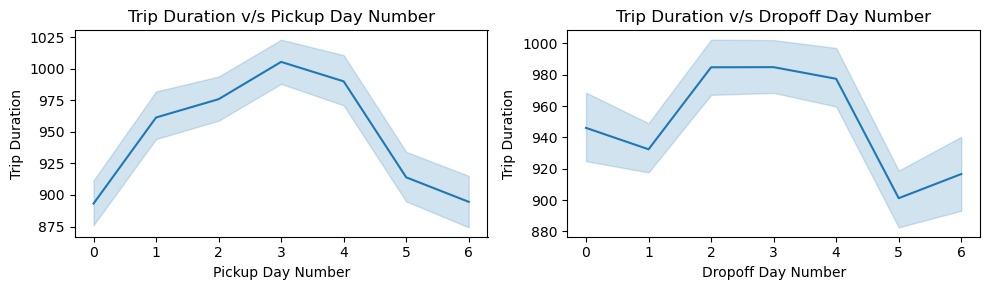

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

sns.lineplot(x='pickup_day_number', y='trip_duration', data=data, ax=axs[0])
axs[0].set_xlabel('Pickup Day Number')
axs[0].set_ylabel('Trip Duration')
axs[0].set_title('Trip Duration v/s Pickup Day Number')

sns.lineplot(x='dropoff_day_number', y='trip_duration', data=data, ax=axs[1])
axs[1].set_xlabel('Dropoff Day Number')
axs[1].set_ylabel('Trip Duration')
axs[1].set_title('Trip Duration v/s Dropoff Day Number')

plt.tight_layout()

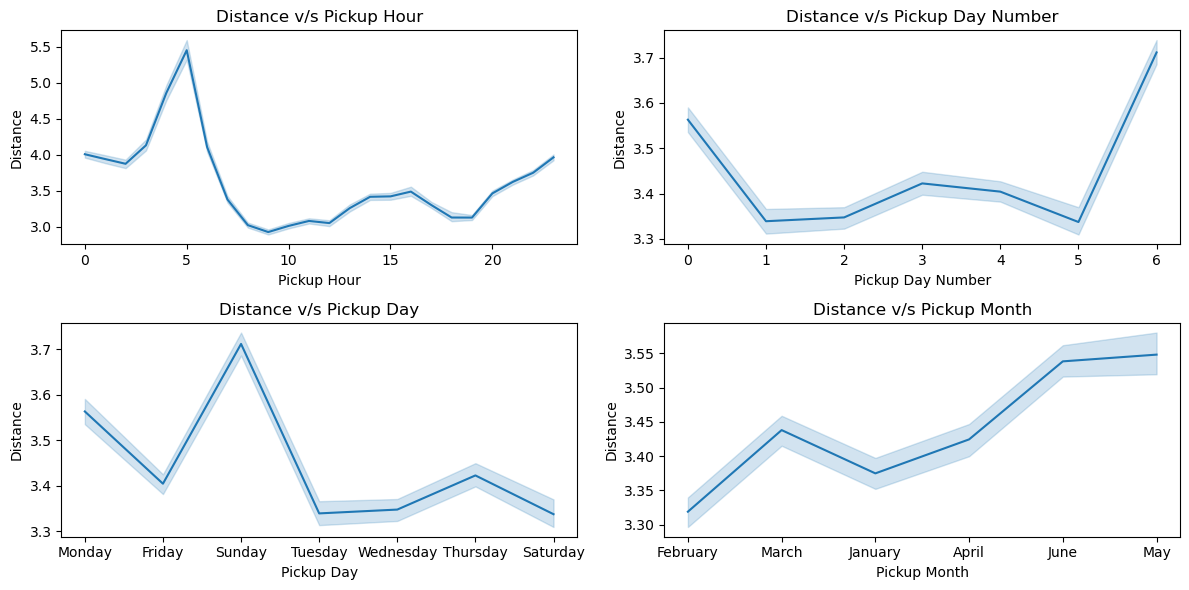

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

sns.lineplot(x=data['pickup_hour'], y=data['distance'], ax=axes[0, 0])
sns.lineplot(x=data['pickup_day_number'], y=data['distance'], ax=axes[0, 1])
sns.lineplot(x=data['pickup_day'], y=data['distance'], ax=axes[1, 0])
sns.lineplot(x=data['pickup_month'], y=data['distance'], ax=axes[1, 1])

axes[0, 0].set_title('Distance v/s Pickup Hour')
axes[0, 0].set_xlabel('Pickup Hour')
axes[0, 0].set_ylabel('Distance')

axes[0, 1].set_title('Distance v/s Pickup Day Number')
axes[0, 1].set_xlabel('Pickup Day Number')
axes[0, 1].set_ylabel('Distance')

axes[1, 0].set_title('Distance v/s Pickup Day')
axes[1, 0].set_xlabel('Pickup Day')
axes[1, 0].set_ylabel('Distance')

axes[1, 1].set_title('Distance v/s Pickup Month')
axes[1, 1].set_xlabel('Pickup Month')
axes[1, 1].set_ylabel('Distance')

plt.tight_layout()
plt.show()

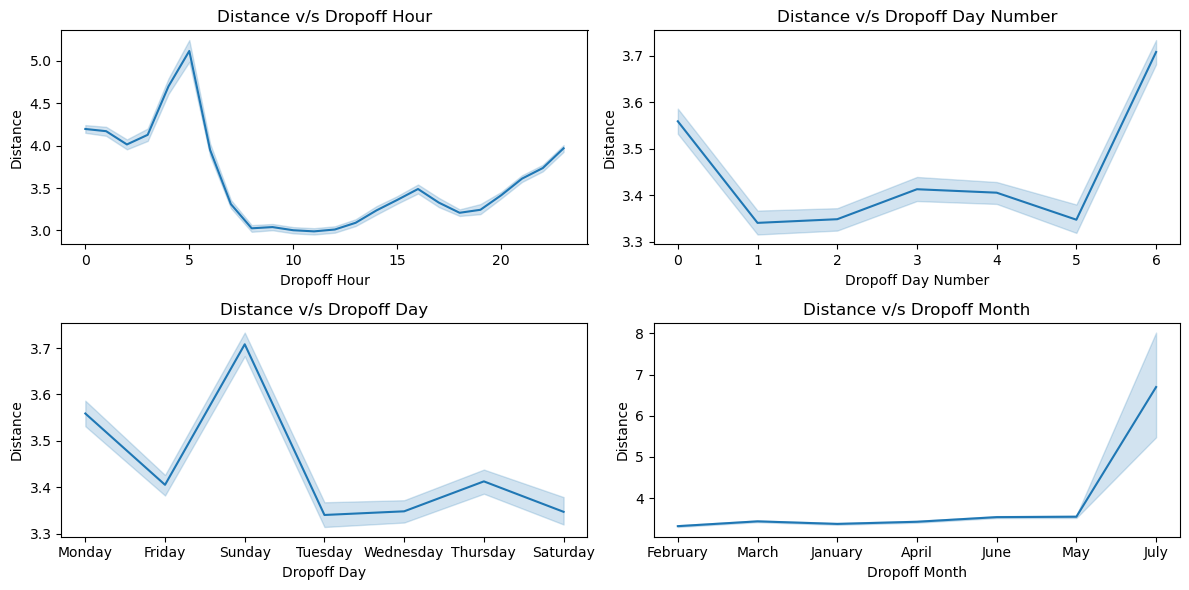

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

sns.lineplot(x=data['dropoff_hour'], y=data['distance'], ax=axes[0, 0])
sns.lineplot(x=data['dropoff_day_number'], y=data['distance'], ax=axes[0, 1])
sns.lineplot(x=data['dropoff_day'], y=data['distance'], ax=axes[1, 0])
sns.lineplot(x=data['dropoff_month'], y=data['distance'], ax=axes[1, 1])

axes[0, 0].set_title('Distance v/s Dropoff Hour')
axes[0, 0].set_xlabel('Dropoff Hour')
axes[0, 0].set_ylabel('Distance')

axes[0, 1].set_title('Distance v/s Dropoff Day Number')
axes[0, 1].set_xlabel('Dropoff Day Number')
axes[0, 1].set_ylabel('Distance')

axes[1, 0].set_title('Distance v/s Dropoff Day')
axes[1, 0].set_xlabel('Dropoff Day')
axes[1, 0].set_ylabel('Distance')

axes[1, 1].set_title('Distance v/s Dropoff Month')
axes[1, 1].set_xlabel('Dropoff Month')
axes[1, 1].set_ylabel('Distance')

plt.tight_layout()
plt.show()

# Multivariate Analysis

### Finding correlation and plotting it

In [48]:
correlation = data.corr()

In [49]:
correlation

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day_number,dropoff_day_number,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,distance
vendor_id,1.000000,0.286462,0.008202,0.002857,0.002371,0.005260,0.035205,0.000786,0.000899,0.009769,9.701486e-03,0.000051,1.449098e-04,0.006516
passenger_count,0.286462,1.000000,0.001164,-0.004698,-0.000027,-0.003944,0.016520,0.025757,0.025940,0.009849,9.213857e-03,-0.000213,-3.129552e-05,0.009178
pickup_longitude,0.008202,0.001164,1.000000,0.047648,0.780649,0.118472,0.041561,-0.016027,-0.016844,0.010762,1.117182e-02,-0.003696,-1.917578e-03,0.251472
pickup_latitude,0.002857,-0.004698,0.047648,1.000000,0.119972,0.479358,-0.044442,-0.029078,-0.029257,0.011424,1.805920e-02,0.002838,7.303935e-04,-0.128440
dropoff_longitude,0.002371,-0.000027,0.780649,0.119972,1.000000,0.149598,0.025331,-0.001472,-0.001396,-0.022014,-2.319331e-02,-0.003605,-2.504285e-03,0.132353
dropoff_latitude,0.005260,-0.003944,0.118472,0.479358,0.149598,1.000000,-0.035451,-0.022027,-0.022396,0.014259,1.817335e-02,0.002801,-5.076340e-04,-0.153765
trip_duration,0.035205,0.016520,0.041561,-0.044442,0.025331,-0.035451,1.000000,-0.001954,-0.003706,0.005488,4.082423e-03,-0.004527,-5.622095e-03,0.152153
pickup_day_number,0.000786,0.025757,-0.016027,-0.029078,-0.001472,-0.022027,-0.001954,1.000000,0.993790,-0.082082,-8.576719e-02,-0.000052,-3.499387e-04,0.007792
dropoff_day_number,0.000899,0.025940,-0.016844,-0.029257,-0.001396,-0.022396,-0.003706,0.993790,1.000000,-0.078779,-8.987681e-02,0.002244,-2.775322e-03,0.008230
pickup_hour,0.009769,0.009849,0.010762,0.011424,-0.022014,0.014259,0.005488,-0.082082,-0.078779,1.000000,9.345925e-01,-0.003544,-2.756920e-03,-0.016258


<AxesSubplot:>

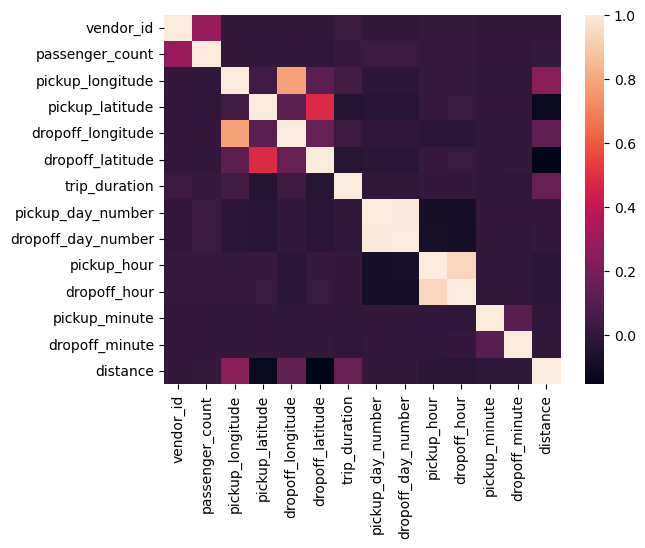

In [50]:
sns.heatmap(correlation)